Timeseries Plot For Multiple Model Builds

In [16]:
renv::load(here::here())

In [17]:
library(readr)
library(dplyr)
library(tidyr)
library(stringr)
library(magrittr)
library(padr)
library(kableExtra)
library(purrr)
library(ggplot2)
library(ggthemr)
library(here)
library(lubridate)
library(caret)
library(scales)

ggthemr("fresh")
devtools::load_all()



select_season <- "poac20"


Loading CHAPo



In [18]:
load(paste0(here(), "/data/other/species.RData"))
load(paste0(here(), "/data/other/stations.RData"))
data_dwh <- import_data_dwh(paste0(here(), "/data/dwh/pollen_dwh_hourly.txt"))


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  PARAMETER = col_character()
)
ℹ Use `spec()` for the full column specifications.




In [19]:
data_dwh <- import_data_dwh(paste0(here(), "/data/dwh/pollen_dwh_hourly.txt"))

if (select_season == "alnu20") {
  data_osm <- import_data_cosmo("/scratch/sadamov/wd/20_alnu_osm/mod_pollen_combined.txt", type = "Operational - C1E")
  data_pheno_v1 <- import_data_cosmo("/scratch/sadamov/wd/20_alnu_pheno_v1/mod_pollen_combined.txt", type = "Phenology V1")
  data_pheno_v2 <- import_data_cosmo("/scratch/sadamov/wd/20_alnu_pheno_v2/mod_pollen_combined.txt", type = "Phenology V2")
  data_pheno_v3 <- import_data_cosmo("/scratch/sadamov/wd/20_alnu_pheno_v3/mod_pollen_combined.txt", type = "Phenology V3")
  data_pheno_v4 <- import_data_cosmo("/scratch/sadamov/wd/20_alnu_pheno_v4/mod_pollen_combined.txt", type = "Phenology V4")
  data_pheno_v5 <- import_data_cosmo("/scratch/sadamov/wd/20_alnu_pheno_v5/mod_pollen_combined.txt", type = "Phenology V5")
  data_pheno_v6 <- import_data_cosmo("/scratch/sadamov/wd/20_alnu_pheno_v6/mod_pollen_combined.txt", type = "Phenology V6")
  data_tune_v2 <- import_data_cosmo("/scratch/sadamov/wd/20_alnu_tuning_v2/mod_pollen_combined.txt", type = "Tuning V2")
  # data_pheno_v1 %<>% mutate(value = 0.6 * value)
  # data_pheno_v2 %<>% mutate(value = 0.6 * value)
  # data_pheno_v3 %<>% mutate(value = 0.6 * value)
  # data_pheno_v4 %<>% mutate(value = 0.6 * value)
  # data_pheno_v5 %<>% mutate(value = 0.6 * value)
  data_pheno_v6 %<>% mutate(value = 0.6 * value)
} else if (select_season == "alnu19") {
  data_osm <- import_data_cosmo("/scratch/sadamov/wd/19_alnu_osm/mod_pollen_combined.txt", type = "Operational - C1E")
  data_pheno_v1 <- import_data_cosmo("/scratch/sadamov/wd/19_alnu_pheno_v1/mod_pollen_combined.txt", type = "Phenology V1")
  data_pheno_v2 <- import_data_cosmo("/scratch/sadamov/wd/19_alnu_pheno_v2/mod_pollen_combined.txt", type = "Phenology V2")
  # data_pheno_v1 %<>% mutate(value = 0.6 * value)
  # data_pheno_v2 %<>% mutate(value = 0.6 * value)
} else if (select_season == "alnu21") {
  data_osm <- import_data_cosmo("/scratch/sadamov/wd/21_alnu_osm/mod_pollen_combined.txt", type = "Operational - C1E")
  data_pheno_v3 <- import_data_cosmo("/scratch/sadamov/wd/21_alnu_pheno_v3/mod_pollen_combined.txt", type = "Phenology V3")
  data_pheno_v4 <- import_data_cosmo("/scratch/sadamov/wd/21_alnu_pheno_v4/mod_pollen_combined.txt", type = "Phenology V4")
  data_pheno_v5 <- import_data_cosmo("/scratch/sadamov/wd/21_alnu_pheno_v5/mod_pollen_combined.txt", type = "Phenology V5")
  data_tune_v2 <- import_data_cosmo("/scratch/sadamov/wd/21_alnu_tuning_v2/mod_pollen_combined.txt", type = "Tuning V2")
  data_tune_v3 <- import_data_cosmo("/scratch/sadamov/wd/21_alnu_tuning_v3/mod_pollen_combined.txt", type = "Tuning V3")
  # data_pheno_v3 %<>% mutate(value = 0.6 * value)
  # data_pheno_v4 %<>% mutate(value = 0.6 * value)
  # data_pheno_v5 %<>% mutate(value = 0.6 * value)
} else if (select_season == "betu20") {
  data_osm <- import_data_cosmo("/scratch/sadamov/wd/20_betu_osm/mod_pollen_combined.txt", type = "Operational - C1E")
  data_pheno_v1 <- import_data_cosmo("/scratch/sadamov/wd/20_betu_pheno_v1/mod_pollen_combined.txt", type = "Phenology V1")
  data_pheno_v2 <- import_data_cosmo("/scratch/sadamov/wd/20_betu_pheno_v2/mod_pollen_combined.txt", type = "Phenology V2")
  data_pheno_v3 <- import_data_cosmo("/scratch/sadamov/wd/20_betu_pheno_v3/mod_pollen_combined.txt", type = "Phenology V3")
  data_pheno_v4 <- import_data_cosmo("/scratch/sadamov/wd/20_betu_pheno_v4/mod_pollen_combined.txt", type = "Phenology V4")
  data_pheno_v5 <- import_data_cosmo("/scratch/sadamov/wd/20_betu_pheno_v5/mod_pollen_combined.txt", type = "Phenology V5")
  data_pheno_v6 <- import_data_cosmo("/scratch/sadamov/wd/20_betu_pheno_v6/mod_pollen_combined.txt", type = "Phenology V6")
  data_tune_v1 <- import_data_cosmo("/scratch/sadamov/wd/20_betu_tuning_v1/mod_pollen_combined.txt", type = "Tuning V1")
  data_tune_v2 <- import_data_cosmo("/scratch/sadamov/wd/20_betu_tuning_v2/mod_pollen_combined.txt", type = "Tuning V2")
} else if (select_season == "betu21") {
  data_osm <- import_data_cosmo("/scratch/sadamov/wd/21_betu_osm/mod_pollen_combined.txt", type = "Operational - C1E")
  data_tune_v1 <- import_data_cosmo("/scratch/sadamov/wd/21_betu_tuning_v1/mod_pollen_combined.txt", type = "Tuning V1")
  data_tune_v2 <- import_data_cosmo("/scratch/sadamov/wd/21_betu_tuning_v2/mod_pollen_combined.txt", type = "Tuning V2")
  data_tune_v3 <- import_data_cosmo("/scratch/sadamov/wd/21_betu_tuning_v3/mod_pollen_combined.txt", type = "Tuning V3")
} else if (select_season == "betu19") {
  data_osm <- import_data_cosmo("/scratch/sadamov/wd/19_betu_osm/mod_pollen_combined.txt", type = "Operational - C1E")
  data_pheno_v1 <- import_data_cosmo("/scratch/sadamov/wd/19_betu_pheno_v1/mod_pollen_combined.txt", type = "Phenology V1")
  data_pheno_v2 <- import_data_cosmo("/scratch/sadamov/wd/19_betu_pheno_v2/mod_pollen_combined.txt", type = "Phenology V2")
} else if (select_season == "poac20") {
  data_osm <- import_data_cosmo("/scratch/sadamov/wd/20_poac_osm/mod_pollen_combined.txt", type = "Operational - C1E")
  data_pheno_v1 <- import_data_cosmo("/scratch/sadamov/wd/20_poac_pheno_v1/mod_pollen_combined.txt", type = "Phenology V1")
  data_pheno_v2 <- import_data_cosmo("/scratch/sadamov/wd/20_poac_pheno_v2/mod_pollen_combined.txt", type = "Phenology V2")
  data_pheno_v3 <- import_data_cosmo("/scratch/sadamov/wd/20_poac_pheno_v3/mod_pollen_combined.txt", type = "Phenology V3")
  data_pheno_v4 <- import_data_cosmo("/scratch/sadamov/wd/20_poac_pheno_v4/mod_pollen_combined.txt", type = "Phenology V4")
  data_pheno_v5 <- import_data_cosmo("/scratch/sadamov/wd/20_poac_pheno_v5/mod_pollen_combined.txt", type = "Phenology V5")
  data_pheno_v6 <- import_data_cosmo("/scratch/sadamov/wd/20_poac_pheno_v6/mod_pollen_combined.txt", type = "Phenology V6")
  data_tune_v3 <- import_data_cosmo("/scratch/sadamov/wd/20_poac_tuning_v3/mod_pollen_combined.txt", type = "Tuning V3")
} else if (select_season == "poac19") {
  data_osm <- import_data_cosmo("/scratch/sadamov/wd/19_poac_osm/mod_pollen_combined.txt", type = "Operational - C1E")
  data_pheno_v1 <- import_data_cosmo("/scratch/sadamov/wd/19_poac_pheno_v1/mod_pollen_combined.txt", type = "Phenology V1")
  data_pheno_v2 <- import_data_cosmo("/scratch/sadamov/wd/19_poac_pheno_v2/mod_pollen_combined.txt", type = "Phenology V2")
}

data_list <- list(
  dwh = data_dwh
  ,osm = data_osm
  # tune = data_tune_v1,
  # ,tune_v2 = data_tune_v2
  ,tune_v3 = data_tune_v3
  # ,pheno_v1 = data_pheno_v1
  # ,pheno_v2 = data_pheno_v2
  # ,pheno_v3 = data_pheno_v3
  # ,pheno_v4 = data_pheno_v4
  # ,pheno_v5 = data_pheno_v5
  ,pheno_v6 = data_pheno_v6
)

if (select_season == "alnu21") {
data_list <- map(data_list, ~ .x %>%
    filter(date > as.Date("2021-01-15")))
}

if (select_season == "poac20") {
data_list <- map(data_list, ~ .x %>%
    filter(between(date, as.Date("2020-04-01"), as.Date("2020-09-01"))))
}

data_daily_list <- map(data_list, ~ .x %>%
  aggregate_pollen() %>%
  impute_daily() %>%
  filter(measurement == "concentration"))

data_daily <- data_daily_list %>% bind_rows()

data_daily_comp <- map(data_daily_list[-1], ~ data_daily_list$dwh %>%
  select(date, taxon, station, obs = value) %>%
  right_join(.x, by = c("taxon", "date", "station")) %>%
  select(date, taxon, station, obs, value))


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  PARAMETER = col_character()
)
ℹ Use `spec()` for the full column specifications.



── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  PARAMETER = col_character()
)
ℹ Use `spec()` for the full column specifications.



── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  PARAMETER = col_character()
)
ℹ Use `spec()` for the full column specifications.



── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .defau

In [20]:
if (select_season == "alnu20") {
  data_osm_sdes <- import_data_cosmo("/scratch/sadamov/wd/20_alnu_osm/mod_sdes_combined.txt", type = "Operational - C1E")
  data_pheno_v1_sdes <- import_data_cosmo("/scratch/sadamov/wd/20_alnu_pheno_v1/mod_sdes_combined.txt", type = "Phenology V1")
  data_pheno_v2_sdes <- import_data_cosmo("/scratch/sadamov/wd/20_alnu_pheno_v2/mod_sdes_combined.txt", type = "Phenology V2")
  data_pheno_v3_sdes <- import_data_cosmo("/scratch/sadamov/wd/20_alnu_pheno_v3/mod_sdes_combined.txt", type = "Phenology V3")
  data_pheno_v4_sdes <- import_data_cosmo("/scratch/sadamov/wd/20_alnu_pheno_v4/mod_sdes_combined.txt", type = "Phenology V4")
  data_pheno_v5_sdes <- import_data_cosmo("/scratch/sadamov/wd/20_alnu_pheno_v5/mod_sdes_combined.txt", type = "Phenology V5")
  data_pheno_v6_sdes <- import_data_cosmo("/scratch/sadamov/wd/20_alnu_pheno_v6/mod_sdes_combined.txt", type = "Phenology V6")
  data_tune_v2_sdes <- import_data_cosmo("/scratch/sadamov/wd/20_alnu_tuning_v2/mod_sdes_combined.txt", type = "Tuning V2")
} else if (select_season == "alnu19") {
  data_osm_sdes <- import_data_cosmo("/scratch/sadamov/wd/19_alnu_osm/mod_sdes_combined.txt", type = "Operational - C1E")
  data_pheno_v1_sdes <- import_data_cosmo("/scratch/sadamov/wd/19_alnu_pheno_v1/mod_sdes_combined.txt", type = "Phenology V1")
  data_pheno_v2_sdes <- import_data_cosmo("/scratch/sadamov/wd/19_alnu_pheno_v2/mod_sdes_combined.txt", type = "Phenology V2")
} else if (select_season == "alnu21") {
  data_osm_sdes <- import_data_cosmo("/scratch/sadamov/wd/21_alnu_osm/mod_sdes_combined.txt", type = "Operational - C1E")
  data_pheno_v3_sdes <- import_data_cosmo("/scratch/sadamov/wd/21_alnu_pheno_v3/mod_sdes_combined.txt", type = "Phenology V3")
  data_pheno_v4_sdes <- import_data_cosmo("/scratch/sadamov/wd/21_alnu_pheno_v4/mod_sdes_combined.txt", type = "Phenology V4")
  data_pheno_v5_sdes <- import_data_cosmo("/scratch/sadamov/wd/21_alnu_pheno_v5/mod_sdes_combined.txt", type = "Phenology V5")
  data_tune_v2_sdes <- import_data_cosmo("/scratch/sadamov/wd/21_alnu_tuning_v2/mod_sdes_combined.txt", type = "Tuning V2")
  data_tune_v3_sdes <- import_data_cosmo("/scratch/sadamov/wd/21_alnu_tuning_v3/mod_sdes_combined.txt", type = "Tuning V3")
} else if (select_season == "betu21") {
  data_osm_sdes <- import_data_cosmo("/scratch/sadamov/wd/21_betu_osm/mod_sdes_combined.txt", type = "Operational - C1E")
  data_tune_v1_sdes <- import_data_cosmo("/scratch/sadamov/wd/21_betu_tuning_v1/mod_sdes_combined.txt", type = "Tuning V1")
  data_tune_v2_sdes <- import_data_cosmo("/scratch/sadamov/wd/21_betu_tuning_v2/mod_sdes_combined.txt", type = "Tuning V2")
  data_tune_v3_sdes <- import_data_cosmo("/scratch/sadamov/wd/21_betu_tuning_v3/mod_sdes_combined.txt", type = "Tuning V3")
} else if (select_season == "betu20") {
  data_osm_sdes <- import_data_cosmo("/scratch/sadamov/wd/20_betu_osm/mod_sdes_combined.txt", type = "Operational - C1E")
  data_pheno_v1_sdes <- import_data_cosmo("/scratch/sadamov/wd/20_betu_pheno_v1/mod_sdes_combined.txt", type = "Phenology V1")
  data_pheno_v2_sdes <- import_data_cosmo("/scratch/sadamov/wd/20_betu_pheno_v2/mod_sdes_combined.txt", type = "Phenology V2")
  data_pheno_v3_sdes <- import_data_cosmo("/scratch/sadamov/wd/20_betu_pheno_v3/mod_sdes_combined.txt", type = "Phenology V3")
  data_pheno_v4_sdes <- import_data_cosmo("/scratch/sadamov/wd/20_betu_pheno_v4/mod_sdes_combined.txt", type = "Phenology V4")
  data_pheno_v5_sdes <- import_data_cosmo("/scratch/sadamov/wd/20_betu_pheno_v5/mod_sdes_combined.txt", type = "Phenology V5")
  data_pheno_v6_sdes <- import_data_cosmo("/scratch/sadamov/wd/20_betu_pheno_v6/mod_sdes_combined.txt", type = "Phenology V6")
  data_tune_v1_sdes <- import_data_cosmo("/scratch/sadamov/wd/20_betu_tuning_v1/mod_sdes_combined.txt", type = "Tuning V1")
  data_tune_v2_sdes <- import_data_cosmo("/scratch/sadamov/wd/20_betu_tuning_v2/mod_sdes_combined.txt", type = "Tuning V2")
} else if (select_season == "betu19") {
  data_osm_sdes <- import_data_cosmo("/scratch/sadamov/wd/19_betu_osm/mod_sdes_combined.txt", type = "Operational - C1E")
  data_pheno_v1_sdes <- import_data_cosmo("/scratch/sadamov/wd/19_betu_pheno_v1/mod_sdes_combined.txt", type = "Phenology V1")
  data_pheno_v2_sdes <- import_data_cosmo("/scratch/sadamov/wd/19_betu_pheno_v2/mod_sdes_combined.txt", type = "Phenology V2")
} else if (select_season == "poac20") {
  data_osm_sdes <- import_data_cosmo("/scratch/sadamov/wd/20_poac_osm/mod_sdes_combined.txt", type = "Operational - C1E")
  data_pheno_v1_sdes <- import_data_cosmo("/scratch/sadamov/wd/20_poac_pheno_v1/mod_sdes_combined.txt", type = "Phenology V1")
  data_pheno_v2_sdes <- import_data_cosmo("/scratch/sadamov/wd/20_poac_pheno_v2/mod_sdes_combined.txt", type = "Phenology V2")
  data_pheno_v3_sdes <- import_data_cosmo("/scratch/sadamov/wd/20_poac_pheno_v3/mod_sdes_combined.txt", type = "Phenology V3")
  data_pheno_v4_sdes <- import_data_cosmo("/scratch/sadamov/wd/20_poac_pheno_v4/mod_sdes_combined.txt", type = "Phenology V4")
  data_pheno_v5_sdes <- import_data_cosmo("/scratch/sadamov/wd/20_poac_pheno_v5/mod_sdes_combined.txt", type = "Phenology V5")
  data_pheno_v6_sdes <- import_data_cosmo("/scratch/sadamov/wd/20_poac_pheno_v6/mod_sdes_combined.txt", type = "Phenology V6")
  data_tune_v3_sdes <- import_data_cosmo("/scratch/sadamov/wd/20_poac_tuning_v3/mod_sdes_combined.txt", type = "Tuning V3")
} else if (select_season == "poac19") {
  data_osm_sdes <- import_data_cosmo("/scratch/sadamov/wd/19_poac_osm/mod_sdes_combined.txt", type = "Operational - C1E")
  data_pheno_v1_sdes <- import_data_cosmo("/scratch/sadamov/wd/19_poac_pheno_v1/mod_sdes_combined.txt", type = "Phenology V1")
  data_pheno_v2_sdes <- import_data_cosmo("/scratch/sadamov/wd/19_poac_pheno_v2/mod_sdes_combined.txt", type = "Phenology V2")
}

data_osm_sdes_list <- list()

data_osm_sdes %<>%
  aggregate_pollen() %>%
  impute_daily()

for (stn in stations$station) {
  max_value <- data_daily_list$osm %>%
    filter(station == stn) %>%
    pull(value) %>%
    max()
  data_osm_sdes_list[[stn]] <- data_osm_sdes %>%
    filter(station == stn) %>%
    mutate(value = rescale(value, to = c(0, 1.2 * max_value)))
}

data_osm_sdes <- data_osm_sdes_list %>%
  bind_rows()

if (exists("data_pheno_v1_sdes")) {
data_pheno_v1_sdes_list <- list()

data_pheno_v1_sdes %<>%
  aggregate_pollen() %>%
  impute_daily()

for (stn in stations$station) {
  max_value <- data_daily_list$osm %>%
    filter(station == stn) %>%
    pull(value) %>%
    max()
  data_pheno_v1_sdes_list[[stn]] <- data_pheno_v1_sdes %>%
    filter(station == stn) %>%
    mutate(value = rescale(value, to = c(0, 1.2 * max_value)))
}

data_pheno_v1_sdes <- data_pheno_v1_sdes_list %>%
  bind_rows()
}

if (exists("data_pheno_v2_sdes")) {
data_pheno_v2_sdes_list <- list()

data_pheno_v2_sdes %<>%
  aggregate_pollen() %>%
  impute_daily()

for (stn in stations$station) {
  max_value <- data_daily_list$osm %>%
    filter(station == stn) %>%
    pull(value) %>%
    max()
  data_pheno_v2_sdes_list[[stn]] <- data_pheno_v2_sdes %>%
    filter(station == stn) %>%
    mutate(value = rescale(value, to = c(0, 1.2 * max_value)))
}

data_pheno_v2_sdes <- data_pheno_v2_sdes_list %>%
  bind_rows()
}

if (exists("data_pheno_v3_sdes")) {
data_pheno_v3_sdes_list <- list()

data_pheno_v3_sdes %<>%
  aggregate_pollen() %>%
  impute_daily()

for (stn in stations$station) {
  max_value <- data_daily_list$osm %>%
    filter(station == stn) %>%
    pull(value) %>%
    max()
  data_pheno_v3_sdes_list[[stn]] <- data_pheno_v3_sdes %>%
    filter(station == stn) %>%
    mutate(value = rescale(value, to = c(0, 1.2 * max_value)))
}

data_pheno_v3_sdes <- data_pheno_v3_sdes_list %>%
  bind_rows()
}

if (exists("data_pheno_v4_sdes")) {
data_pheno_v4_sdes_list <- list()

data_pheno_v4_sdes %<>%
  aggregate_pollen() %>%
  impute_daily()

for (stn in stations$station) {
  max_value <- data_daily_list$osm %>%
    filter(station == stn) %>%
    pull(value) %>%
    max()
  data_pheno_v4_sdes_list[[stn]] <- data_pheno_v4_sdes %>%
    filter(station == stn) %>%
    mutate(value = rescale(value, to = c(0, 1.2 * max_value)))
}

data_pheno_v4_sdes <- data_pheno_v4_sdes_list %>%
  bind_rows()
}

if (exists("data_pheno_v5_sdes")) {
data_pheno_v5_sdes_list <- list()

data_pheno_v5_sdes %<>%
  aggregate_pollen() %>%
  impute_daily()

for (stn in stations$station) {
  max_value <- data_daily_list$osm %>%
    filter(station == stn) %>%
    pull(value) %>%
    max()
  data_pheno_v5_sdes_list[[stn]] <- data_pheno_v5_sdes %>%
    filter(station == stn) %>%
    mutate(value = rescale(value, to = c(0, 1.2 * max_value)))
}

data_pheno_v5_sdes <- data_pheno_v5_sdes_list %>%
  bind_rows()
}

if (exists("data_pheno_v6_sdes")) {
data_pheno_v6_sdes_list <- list()

data_pheno_v6_sdes %<>%
  aggregate_pollen() %>%
  impute_daily()

for (stn in stations$station) {
  max_value <- data_daily_list$osm %>%
    filter(station == stn) %>%
    pull(value) %>%
    max()
  data_pheno_v6_sdes_list[[stn]] <- data_pheno_v6_sdes %>%
    filter(station == stn) %>%
    mutate(value = rescale(value, to = c(0, 1.2 * max_value)))
}

data_pheno_v6_sdes <- data_pheno_v6_sdes_list %>%
  bind_rows()
}

if (exists("data_tune_v1_sdes")) {
data_tune_v1_sdes_list <- list()

data_tune_v1_sdes %<>%
  aggregate_pollen() %>%
  impute_daily()

for (stn in stations$station) {
  max_value <- data_daily_list$osm %>%
    filter(station == stn) %>%
    pull(value) %>%
    max()
  data_tune_v1_sdes_list[[stn]] <- data_tune_v1_sdes %>%
    filter(station == stn) %>%
    mutate(value = rescale(value, to = c(0, 1.2 * max_value)))
}

data_tune_v1_sdes <- data_tune_v1_sdes_list %>%
  bind_rows()
}

if (exists("data_tune_v2_sdes")) {
data_tune_v2_sdes_list <- list()

data_tune_v2_sdes %<>%
  aggregate_pollen() %>%
  impute_daily()

for (stn in stations$station) {
  max_value <- data_daily_list$osm %>%
    filter(station == stn) %>%
    pull(value) %>%
    max()
  data_tune_v2_sdes_list[[stn]] <- data_tune_v2_sdes %>%
    filter(station == stn) %>%
    mutate(value = rescale(value, to = c(0, 1.2 * max_value)))
}

data_tune_v2_sdes <- data_tune_v2_sdes_list %>%
  bind_rows()
}


if (exists("data_tune_v3_sdes")) {
data_tune_v3_sdes_list <- list()

data_tune_v3_sdes %<>%
  aggregate_pollen() %>%
  impute_daily()

for (stn in stations$station) {
  max_value <- data_daily_list$osm %>%
    filter(station == stn) %>%
    pull(value) %>%
    max()
  data_tune_v3_sdes_list[[stn]] <- data_tune_v3_sdes %>%
    filter(station == stn) %>%
    mutate(value = rescale(value, to = c(0, 1.2 * max_value)))
}

data_tune_v3_sdes <- data_tune_v3_sdes_list %>%
  bind_rows()
}


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  PARAMETER = col_character()
)
ℹ Use `spec()` for the full column specifications.



── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  PARAMETER = col_character()
)
ℹ Use `spec()` for the full column specifications.



── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  PARAMETER = col_character()
)
ℹ Use `spec()` for the full column specifications.



── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .defau

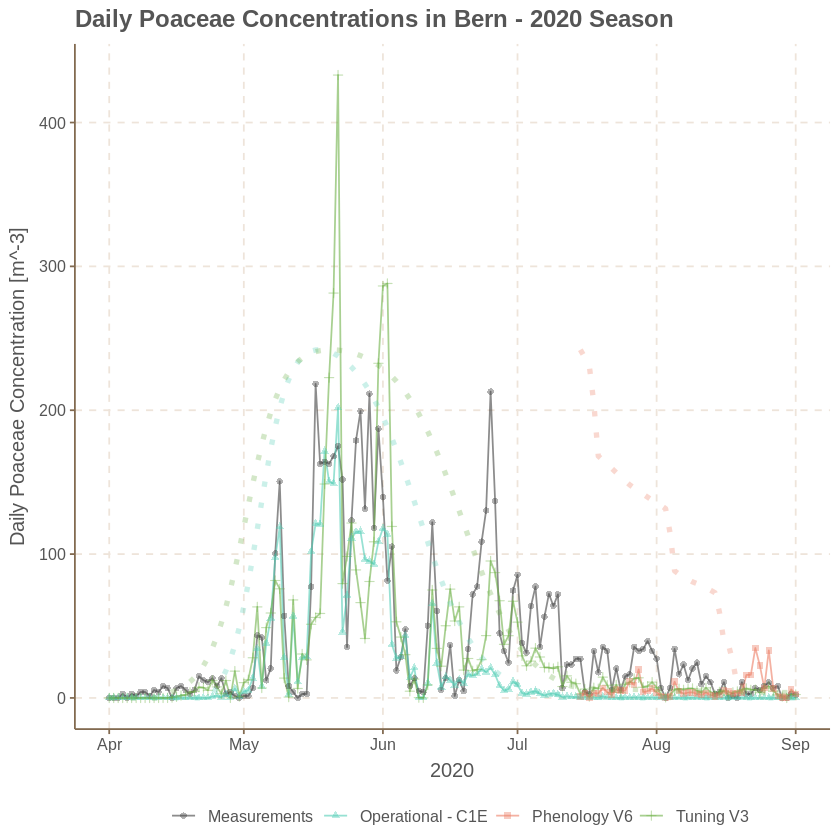

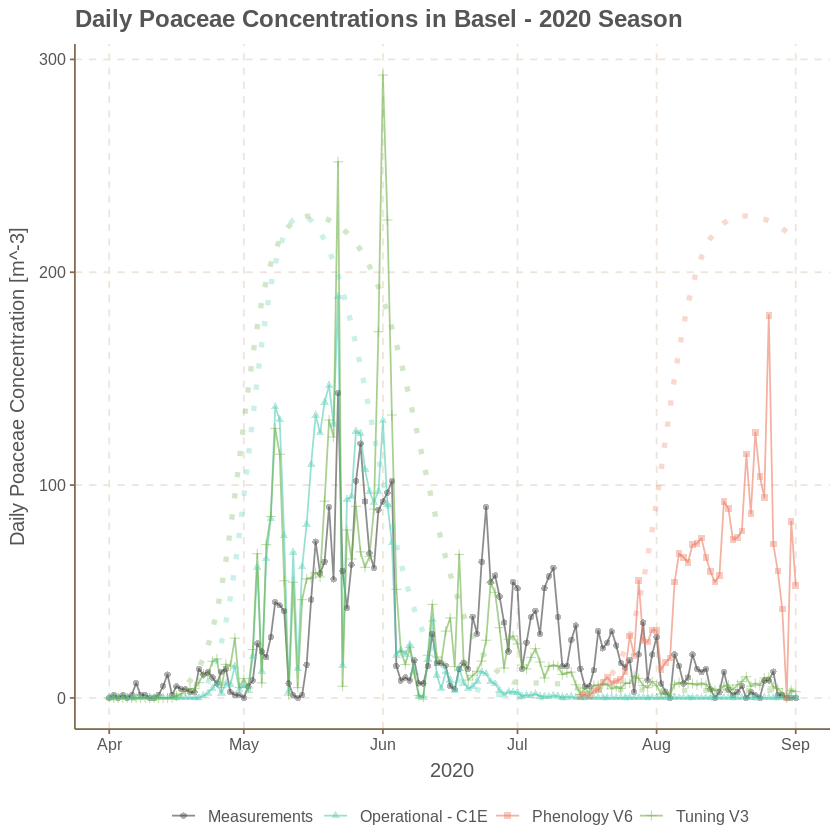

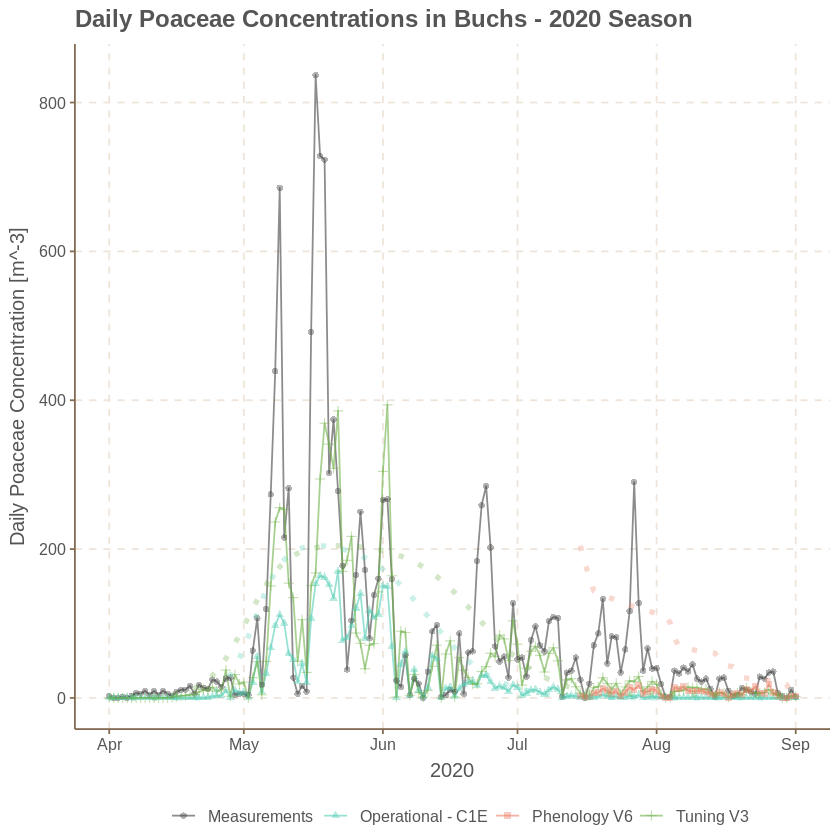

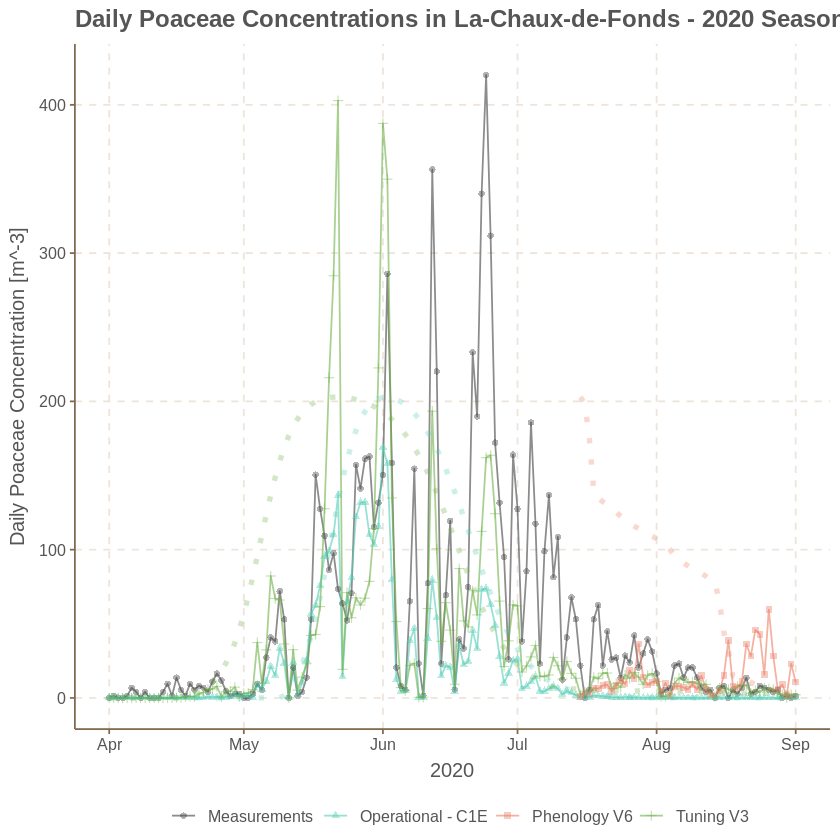

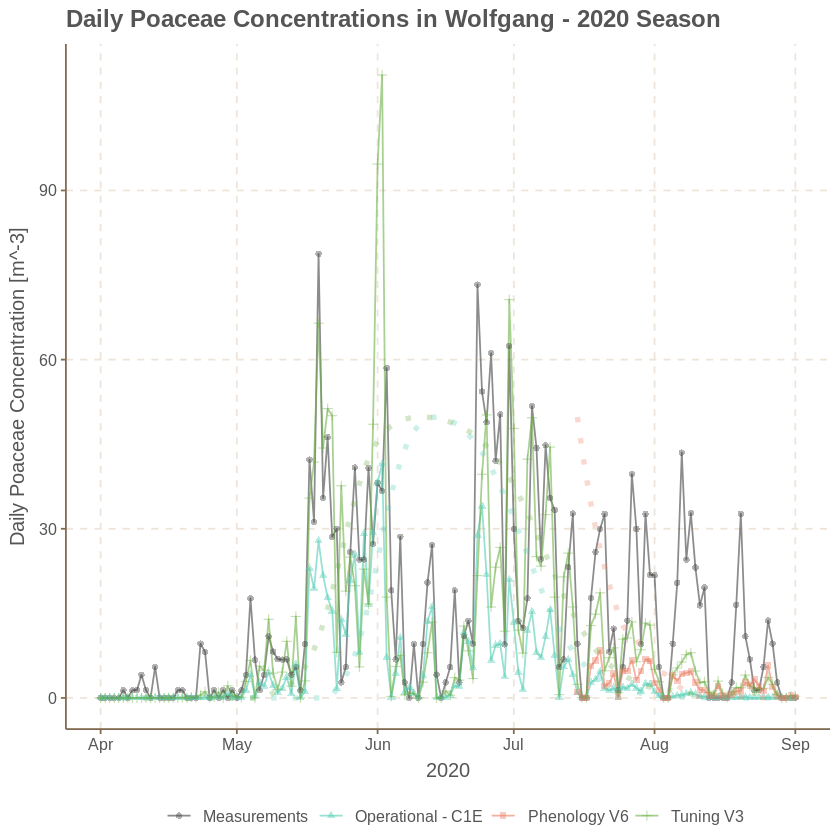

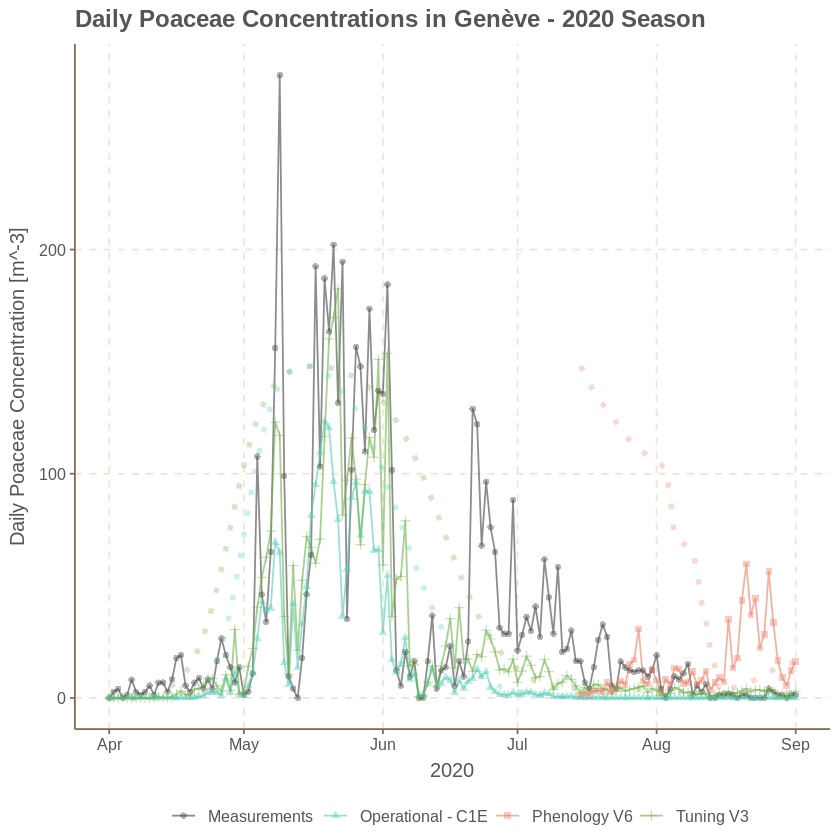

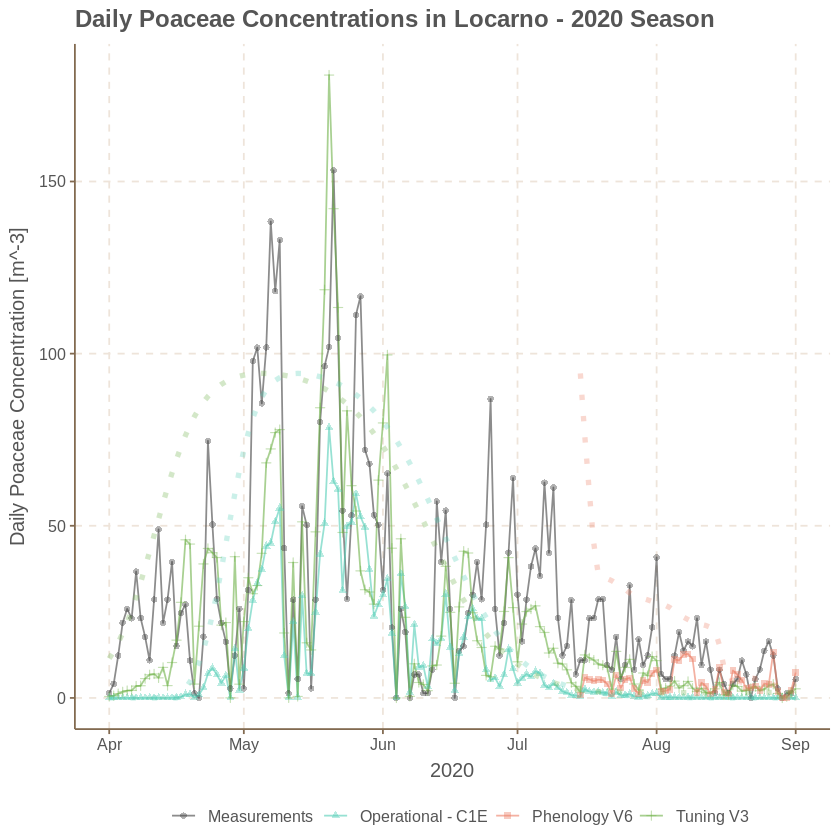

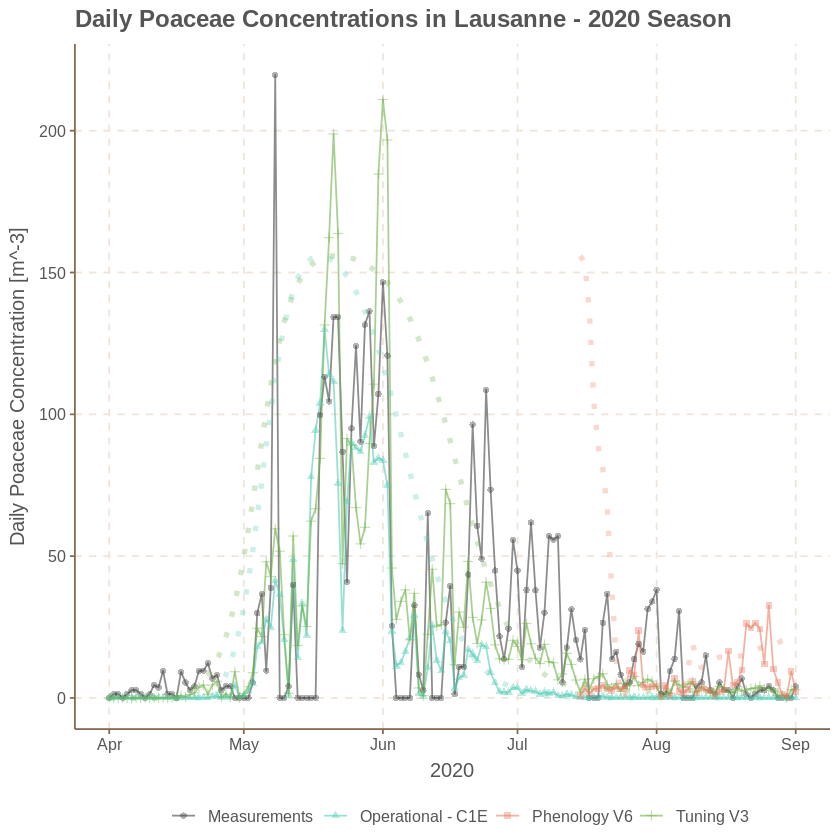

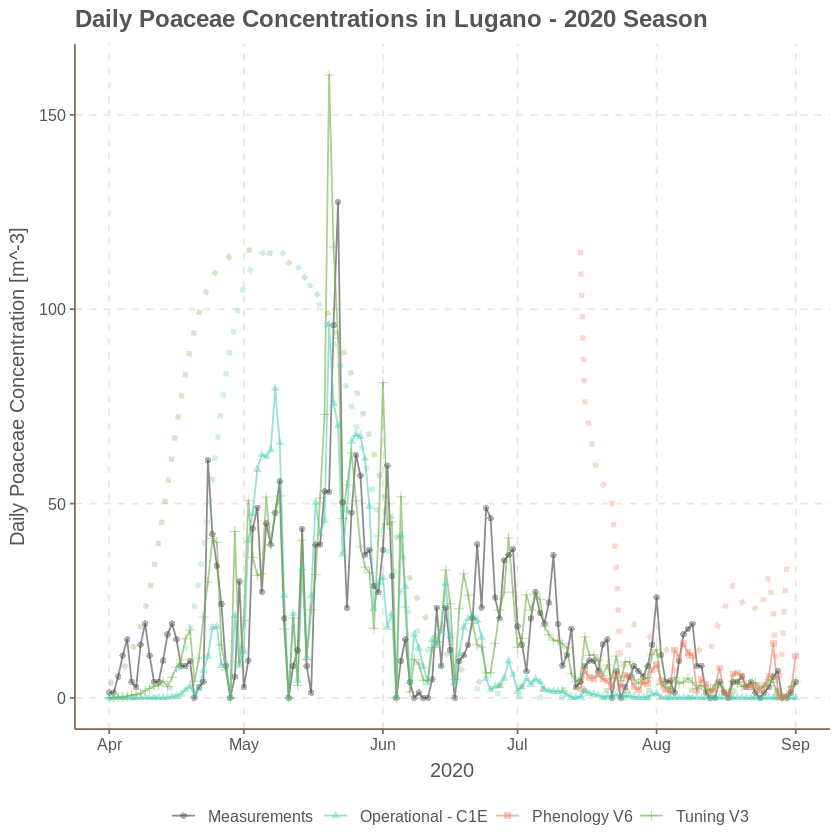

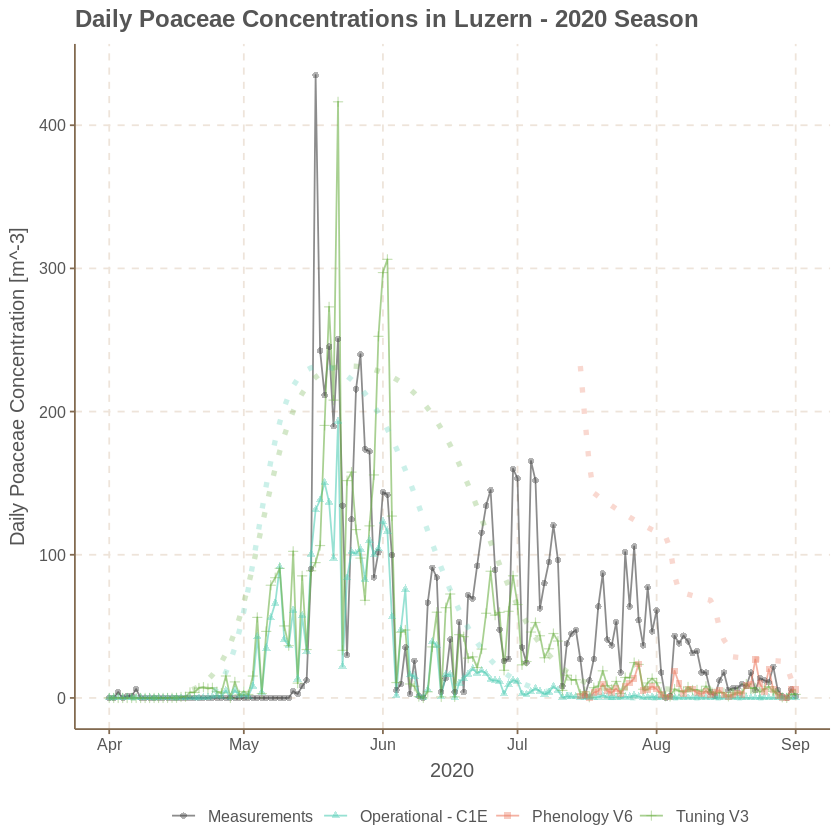

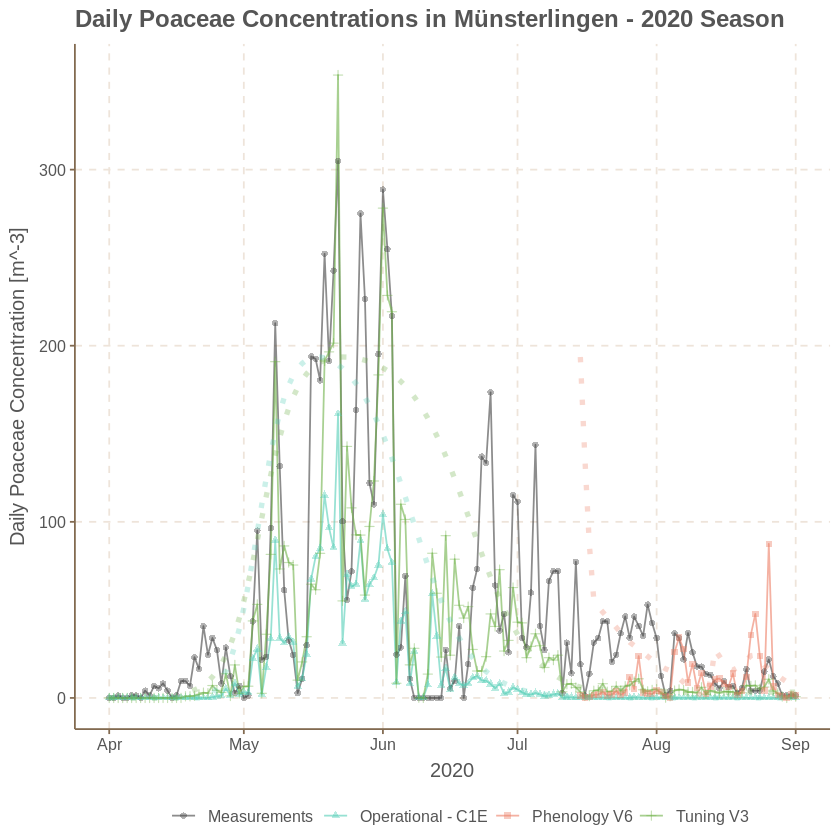

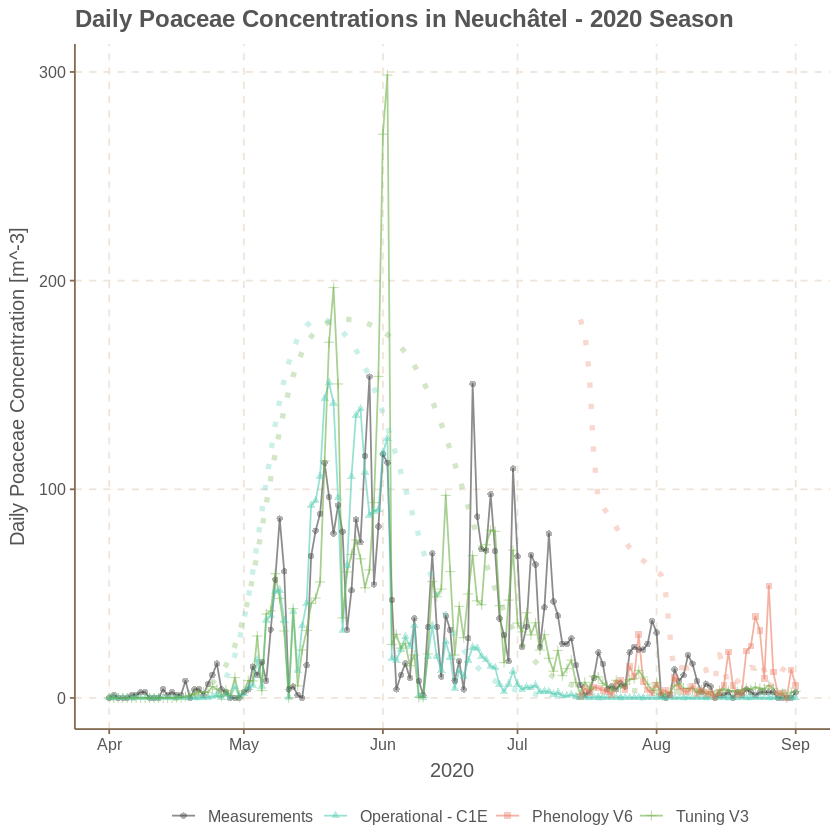

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]

[[11]]

[[12]]

[[13]]

[[14]]


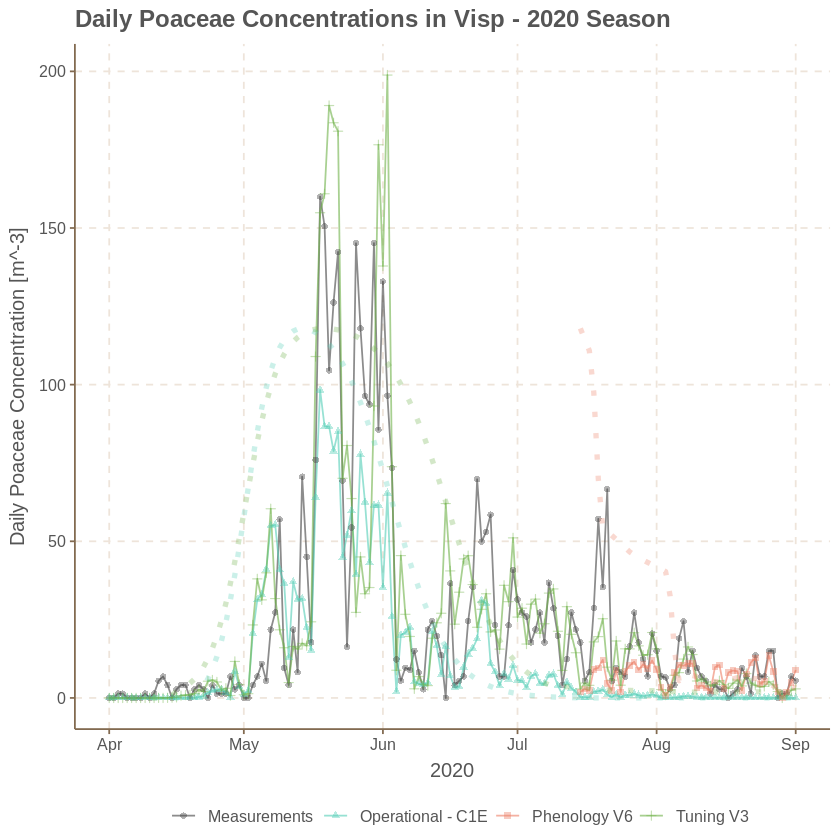

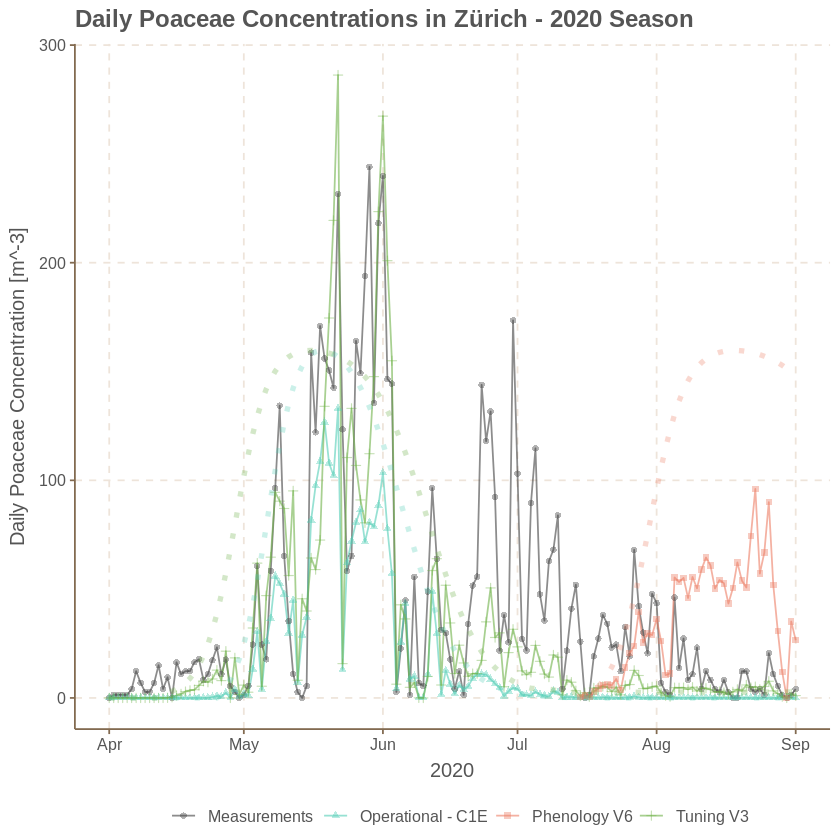

In [21]:
taxon_selected <- data_list$osm %>%
  pull(taxon) %>%
  unique()
start_date <- data_list$osm %>%
  pull(date) %>%
  min()
end_date <- data_list$osm %>%
  pull(date) %>%
  max()
year_selected <- year(start_date)

gg_timeseries <- map(stations$station, ~
data_daily %>%
  filter(
    taxon == taxon_selected,
    station == .x,
    between(date, start_date, end_date),
    type %in% c("Measurements", "Phenology V6", "Operational - C1E", "Tuning V3")
  ) %>%
  ggplot() +
  geom_line(aes(x = date, y = value, col = type), alpha = 0.6) +
  geom_point(aes(x = date, y = value, col = type, shape = type), alpha = 0.4) +
  scale_color_manual(values = c(
    "Measurements" = "#404040",
    "Operational - C1E" = "#52cdb5",
    "Tuning V1" = "#f4b258",
    "Tuning V2" = "#7e0303",
    "Tuning V3" = "#6eb148",
    "Phenology V4" = "#db146a",
    "Phenology V5" = "#5d107c",
    "Phenology V6" = "#ec7d64"
  )) +
  geom_line(data = data_osm_sdes %>%
    filter(
      taxon == taxon_selected,
      station == .x,
      between(date, start_date, end_date)
    ), aes(x = date, y = value), col = "#52cdb5", size = 1.5, alpha = 0.3, lty = 3) +
  # {
  #   if (exists("data_tune_v1_sdes")) {
  #     geom_line(data = data_tune_v1_sdes %>%
  #       filter(
  #         taxon == taxon_selected,
  #         station == .x,
  #         between(date, start_date, end_date)
  #       ), aes(x = date, y = value), col = "#f4b258", size = 1.5, alpha = 0.3, lty = 3)
  #   }
  # } +
  # {
  #   if (exists("data_tune_v2_sdes")) {
  #     geom_line(data = data_tune_v2_sdes %>%
  #       filter(
  #         taxon == taxon_selected,
  #         station == .x,
  #         between(date, start_date, end_date)
  #       ), aes(x = date, y = value), col = "#7e0303", size = 1.5, alpha = 0.3, lty = 3)
  #   }
  # } +
  {
    if (exists("data_tune_v3_sdes")) {
      geom_line(data = data_tune_v3_sdes %>%
        filter(
          taxon == taxon_selected,
          station == .x,
          between(date, start_date, end_date)
        ), aes(x = date, y = value), col = "#6eb148", size = 1.5, alpha = 0.3, lty = 3)
    }
  } +
  # {
  #   if (exists("data_pheno_v4_sdes")) {
  #     geom_line(data = data_pheno_v4_sdes %>%
  #       filter(
  #         taxon == taxon_selected,
  #         station == .x,
  #         between(date, start_date, end_date)
  #       ), aes(x = date, y = value), col = "#db146a", size = 1.5, alpha = 0.3, lty = 3)
  #   }
  # } +
  # {
  #   if (exists("data_pheno_v5_sdes")) {
  #     geom_line(data = data_pheno_v5_sdes %>%
  #       filter(
  #         taxon == taxon_selected,
  #         station == .x,
  #         between(date, start_date, end_date)
  #       ), aes(x = date, y = value), col = "#5d107c", size = 1.5, alpha = 0.3, lty = 3)
  #   }
  # } +
  {
    if (exists("data_pheno_v6_sdes")) {
      geom_line(data = data_pheno_v6_sdes %>%
        filter(
          taxon == taxon_selected,
          station == .x,
          between(date, start_date, end_date)
        ), aes(x = date, y = value), col = "#ec7d64", size = 1.5, alpha = 0.3, lty = 3)
    }
  } +
  theme(legend.position = "bottom", legend.title = element_blank()) +
  xlab(year_selected) +
  ylab(paste("Daily", taxon_selected, "Concentration [m^-3]")) +
  ggtitle(paste0("Daily ", taxon_selected, " Concentrations in ", .x, " - ", year_selected, " Season")))



gg_timeseries


In [22]:
ggsave(paste0(here(), "/vignettes/figures/timeseries.png"), gg_timeseries[[12]], width = 24, height = 13.5, dpi = 300, units = c("cm"))

In the following we are looking at several numeric and categoric metrics to compare the new model builds.

In [23]:
metrics_numeric <- map(data_daily_comp, ~ .x  %>%
  filter(obs >= 10
    # , date < as.Date("2021-05-31")
    ) %>% 
  group_by(station) %>%
  mutate(mean_station = mean(value, na.rm = TRUE)) %>%
  ungroup %>%
  mutate(mean_obs = mean(obs, na.rm = TRUE),
         error = value - obs) %>%
  summarise(
    R2 = cor(value, obs, method = "spearman", use = "complete.obs")^2,
    "Bias/ME" = mean(error),
    MAE = mean(abs(error)),
    RMSE = sqrt(mean((error)^2)),
    SD = sd(error)
    # MSLE = mean((log(1 + value) - log(1 + obs))^2, na.rm = TRUE),
    # RMSLE = sqrt(MSLE),
  ))

metrics_numeric %<>%
  bind_rows() %>%
  mutate(model = names(metrics_numeric))

mae_baseline <- metrics_numeric %>%
  filter(model == "osm") %>%
  pull(MAE)

metrics_numeric %<>%
  mutate("Rel. MAE" = MAE / mae_baseline)

metrics_numeric  %>%
  arrange(MAE) %>%
  kable() %>%
  kable_styling("striped", full_width = FALSE) %>%
  as.character() %>%
  IRdisplay::display_html()

R2,Bias/ME,MAE,RMSE,SD,model,Rel. MAE
0.0009461,-16.45623,23.55178,33.71177,29.47010,pheno_v6,0.5683062
0.4611625,-16.88191,35.26710,59.57026,57.15149,tune_v3,0.8509978
0.4366928,-36.37912,41.44206,67.25468,56.58952,osm,1.0000000



Reference	
Predicted	Event	No Event
Event	A	B
No Event	C	D
The formulas used here are:

Sensitivity = A/(A+C)

Specificity = D/(B+D)

Prevalence = (A+C)/(A+B+C+D)

PPV = (sensitivity * prevalence)/((sensitivity*prevalence) + ((1-specificity)*(1-prevalence)))

NPV = (specificity * (1-prevalence))/(((1-sensitivity)*prevalence) + ((specificity)*(1-prevalence)))

Detection Rate = A/(A+B+C+D)

Detection Prevalence = (A+B)/(A+B+C+D)

Balanced Accuracy = (sensitivity+specificity)/2

Precision = A/(A+B)

Recall = A/(A+C)

F1 = (1+beta^2)*precision*recall/((beta^2 * precision)+recall)

In [24]:
data_valid <- map(data_daily_comp, ~ .x %>%
  # filter(date < as.Date("2020-07-31")) %>%
  mutate(
    conc_obs = case_when(
      taxon == "Alnus" & obs < 1 ~ "nothing",
      taxon == "Alnus" & obs >= 1 & obs <= 10 ~ "weak",
      taxon == "Alnus" & obs >= 11 & obs <= 69 ~ "medium",
      taxon == "Alnus" & obs >= 70 & obs <= 249 ~ "strong",
      taxon == "Alnus" & obs >= 250 ~ "verystrong",
      taxon == "Betula" & obs < 1 ~ "nothing",
      taxon == "Betula" & obs >= 1 & obs <= 10 ~ "weak",
      taxon == "Betula" & obs >= 11 & obs <= 69 ~ "medium",
      taxon == "Betula" & obs >= 70 & obs <= 299 ~ "strong",
      taxon == "Betula" & obs >= 300 ~ "verystrong",
      taxon == "Poaceae" & obs < 1 ~ "nothing",
      taxon == "Poaceae" & obs >= 1 & obs <= 19 ~ "weak",
      taxon == "Poaceae" & obs >= 20 & obs <= 49 ~ "medium",
      taxon == "Poaceae" & obs >= 50 & obs <= 149 ~ "strong",
      taxon == "Poaceae" & obs >= 150 ~ "verystrong",
      taxon == "Ambrosia" & obs < 1 ~ "nothing",
      taxon == "Ambrosia" & obs >= 1 & obs <= 5 ~ "weak",
      taxon == "Ambrosia" & obs >= 6 & obs <= 10 ~ "medium",
      taxon == "Ambrosia" & obs >= 11 & obs <= 39 ~ "strong",
      taxon == "Ambrosia" & obs >= 40 ~ "verystrong"
    ),
    conc_value = case_when(
      taxon == "Alnus" & value < 1 ~ "nothing",
      taxon == "Alnus" & value >= 1 & value <= 10 ~ "weak",
      taxon == "Alnus" & value >= 11 & value <= 69 ~ "medium",
      taxon == "Alnus" & value >= 70 & value <= 249 ~ "strong",
      taxon == "Alnus" & value >= 250 ~ "verystrong",
      taxon == "Betula" & value < 1 ~ "nothing",
      taxon == "Betula" & value >= 1 & value <= 10 ~ "weak",
      taxon == "Betula" & value >= 11 & value <= 69 ~ "medium",
      taxon == "Betula" & value >= 70 & value <= 299 ~ "strong",
      taxon == "Betula" & value >= 300 ~ "verystrong",
      taxon == "Poaceae" & value < 1 ~ "nothing",
      taxon == "Poaceae" & value >= 1 & value <= 19 ~ "weak",
      taxon == "Poaceae" & value >= 20 & value <= 49 ~ "medium",
      taxon == "Poaceae" & value >= 50 & value <= 149 ~ "strong",
      taxon == "Poaceae" & value >= 150 ~ "verystrong",
      taxon == "Ambrosia" & value < 1 ~ "nothing",
      taxon == "Ambrosia" & value >= 1 & value <= 5 ~ "weak",
      taxon == "Ambrosia" & value >= 6 & value <= 10 ~ "medium",
      taxon == "Ambrosia" & value >= 11 & value <= 39 ~ "strong",
      taxon == "Ambrosia" & value >= 40 ~ "verystrong"
    )
  ) %>%
  mutate_at(
    vars(conc_obs, conc_value),
    ~ factor(., levels = c("nothing", "weak", "medium", "strong", "verystrong"))) %>%
    filter(conc_obs != "nothing"))

confusion_matrix <- map(data_valid, ~ confusionMatrix(.x$conc_value, .x$conc_obs))

metrics_categoric  <- confusion_matrix %>%
  map(~ .x$overall[1:2]) %>%
  bind_rows() %>%
  mutate(model = names(confusion_matrix))

kappa_baseline <- metrics_categoric %>%
  filter(model == "osm") %>%
  pull(Kappa)

accuracy_baseline <- metrics_categoric %>%
  filter(model == "osm") %>%
  pull(Accuracy)

kable_metrics_categoric <- metrics_categoric %>%
  mutate("Rel. Accuracy" = Accuracy / accuracy_baseline,
         "Rel. Kappa" = Kappa / kappa_baseline) %>%
  arrange(desc(Kappa)) %>%
  kable() %>%
  kable_styling("striped", full_width = FALSE)

kable_metrics_categoric %>%
  as.character() %>%
  IRdisplay::display_html()

Accuracy,Kappa,model,Rel. Accuracy,Rel. Kappa
0.5010787,0.2480440,tune_v3,2.228607,8.732713
0.2248394,0.0284040,osm,1.000000,1.000000
0.5462185,-0.0593472,pheno_v6,2.429372,-2.089395


In [25]:
confusion_matrix

$osm
Confusion Matrix and Statistics

            Reference
Prediction   nothing weak medium strong verystrong
  nothing          0  676    174     17          0
  weak             0  220    197    141          9
  medium           0   44     63     67         12
  strong           0    7     26    123         76
  verystrong       0    0      0      2         14

Overall Statistics
                                          
               Accuracy : 0.2248          
                 95% CI : (0.2061, 0.2445)
    No Information Rate : 0.507           
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0284          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: nothing Class: weak Class: medium Class: strong
Sensitivity                      NA      0.2323       0.13696       0.35143
Specificity                  0.5359      0.6232     

In [26]:
save_kable(kable_metrics_categoric, file = paste0(here(), "/vignettes/tables/test.html"))